In [1]:
import sys
import os
from pathlib import Path

root_dir = Path(os.getcwd())

if str(root_dir.parents[1]) not in sys.path:
  sys.path.append(str(root_dir.parents[1]))

#print(sys.path)

from LMORL.BAN.API.agents.DQNHybrid import DQNHybrid

import mo_gymnasium as mo_gym

env = mo_gym.make("four-room-v0", render_mode="rgb_array")

In [2]:

input_size = env.observation_space.shape[0]
num_actions = int(env.action_space.n)
action_space = list(range(env.action_space.n))
learning_rate = 0.001
epsilon_decay = 0.995
epsilon_min = 0.1
batch_size = 64
train_start = 64
hidden_size = 128
BAN_SIZE = 3
max_memory_size=2000

agent = DQNHybrid(input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  ban_size=3, max_memory_size=max_memory_size, train_start=100)


11:07:34	Episode		timesteps:	200	Took	1.228656 sec - reward:	[1.0, 0.0, 1.0]	


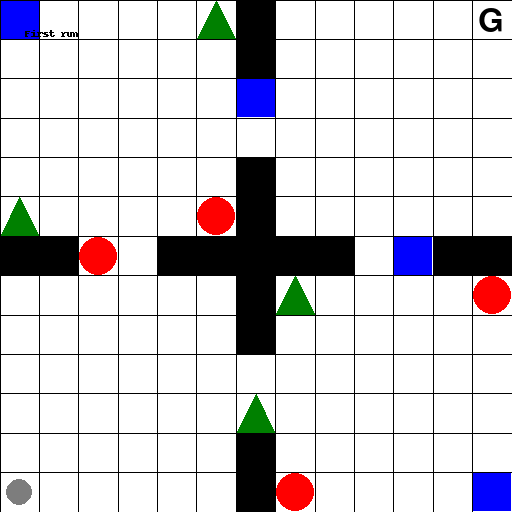

In [3]:
from IPython.display import Image as IpyImg

total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="First run", render=False)

display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

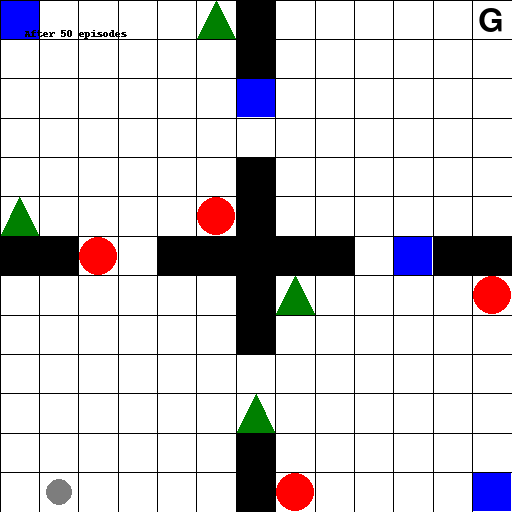

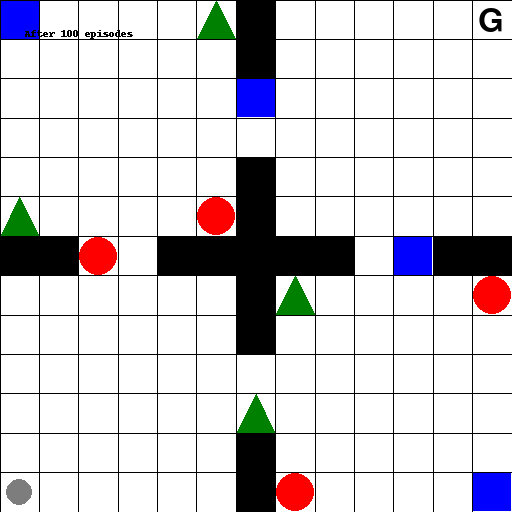

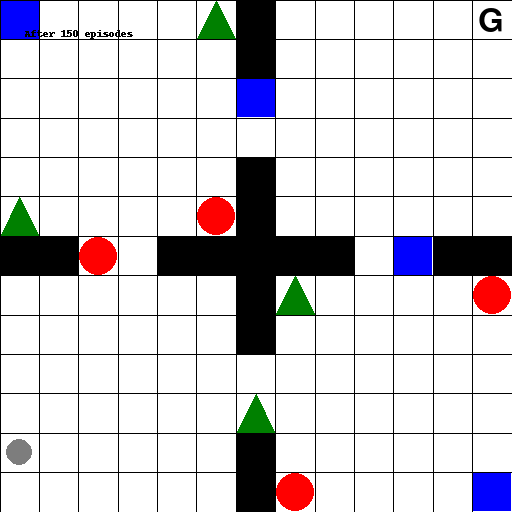

: 

: 

In [4]:
from IPython.display import Image as IpyImg

HOW_MANY_ITERATIONS = 10
EPISODES_PER_ITERATION = 50
REPLAY_FREQUENCY=None
mname = "fooo.model"

for i in range(HOW_MANY_ITERATIONS):
    rewards, avg_rewards, timings = agent.agent_learning(env=env,episodes=EPISODES_PER_ITERATION, replay_frequency=REPLAY_FREQUENCY, mname=mname, verbose=False)
    
    title=f"After {(i+1)*EPISODES_PER_ITERATION} episodes"
    total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title=title, render=False, verbose=False)
    display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))